<a href="https://colab.research.google.com/github/vtanoe08/Python_Vincent/blob/main/DS_python_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 #https://swingtradebot.com/equities?min_vol=250000&min_price=3&max_price=20&adx_trend=&grade=&include_etfs=0&html_button=as_html#
from pandas_datareader import  data,wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
%matplotlib inline

AxesSubplot(0.125,0.2;0.775x0.68)
Symbols    TSLA      RH   ROKU    NFLX      JPM      AEP
count    2688.0  2096.0  862.0  4727.0  10329.0  12695.0
mean       72.0   113.0  112.0    92.0     37.0     36.0
std       130.0    98.0   94.0   139.0     30.0     17.0
min         3.0    25.0   19.0     0.0      3.0     14.0
25%         8.0    57.0   45.0     4.0     12.0     25.0
50%        45.0    87.0   90.0    17.0     35.0     32.0
75%        62.0   126.0  139.0   109.0     48.0     43.0
max       883.0   516.0  470.0   586.0    153.0    104.0
Symbols      TSLA     RH   ROKU   NFLX    JPM   AEP
Date                                               
2021-01-04  730.0  442.0  318.0  523.0  126.0  82.0
2021-01-05  735.0  448.0  335.0  521.0  126.0  81.0
2021-01-06  756.0  468.0  343.0  500.0  132.0  82.0
2021-01-07  816.0  490.0  379.0  509.0  136.0  80.0
2021-01-08  880.0  484.0  399.0  510.0  136.0  79.0
2021-01-11  811.0  488.0  403.0  499.0  138.0  79.0
2021-01-12  849.0  509.0  415.0  494.

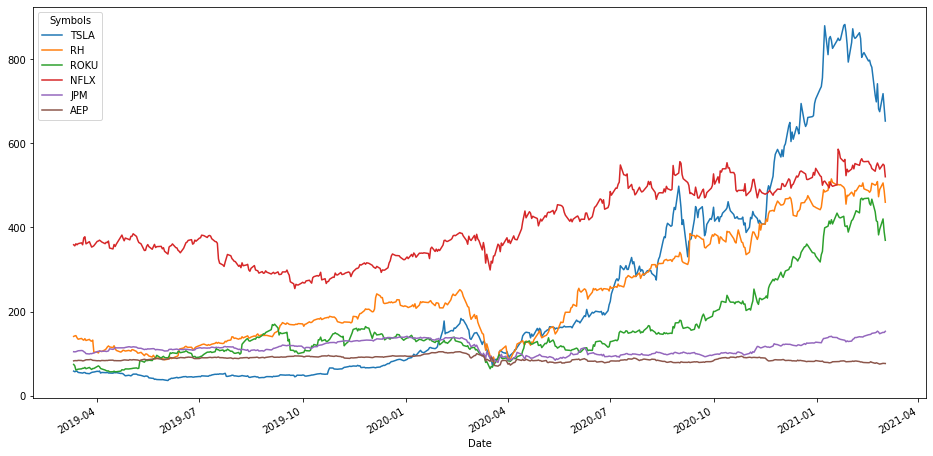

In [18]:
msft=data.DataReader(["TSLA","RH","ROKU","NFLX","JPM","AEP"],data_source='yahoo',start='10/31/1970')
sp500=msft.copy()
print(sp500['Close'].tail(500).plot(figsize=(16,8)));
print(sp500['Close'].describe().round())
print(sp500['Close'].tail(41).round())
#print(sp500[sp500['Close']['MBRX']==53.400002])

In [71]:
500/0.006

83333.33333333333

In [60]:
sp500['Close'].tail(1000).sort_values(ascending=False)

Date
2021-01-07    213.759995
2021-01-21    212.089996
2021-01-22    212.070007
2021-01-14    208.830002
2021-01-08    207.410004
                 ...    
2017-05-24      0.730000
2017-05-19      0.720000
2017-05-26      0.720000
2017-05-17      0.710000
2017-05-18      0.700000
Name: Close, Length: 1000, dtype: float64

In [57]:
25000*0.002

50.0

In [65]:
#wb=pd.read_excel("worldb.xlsx")
weo=pd.read_excel("WEO.xlsx")
#print(wb['status'].head())
print(weo.iloc[:,:5].head(8))

  WEO Country Code  ...                                 Subject Descriptor
0              512  ...            Gross domestic product, constant prices
1              512  ...             Gross domestic product, current prices
2              512  ...  Gross domestic product per capita, constant pr...
3              512  ...                 Inflation, average consumer prices
4              512  ...           Inflation, end of period consumer prices
5              512  ...                                  Unemployment rate
6              512  ...           General government net lending/borrowing
7              512  ...                            Current account balance

[8 rows x 5 columns]


In [104]:
X=weo[weo['Subject Descriptor']=="Gross domestic product, constant prices"]
X1=X.iloc[:,3:]

Text(0.5, 1.0, 'GDP')

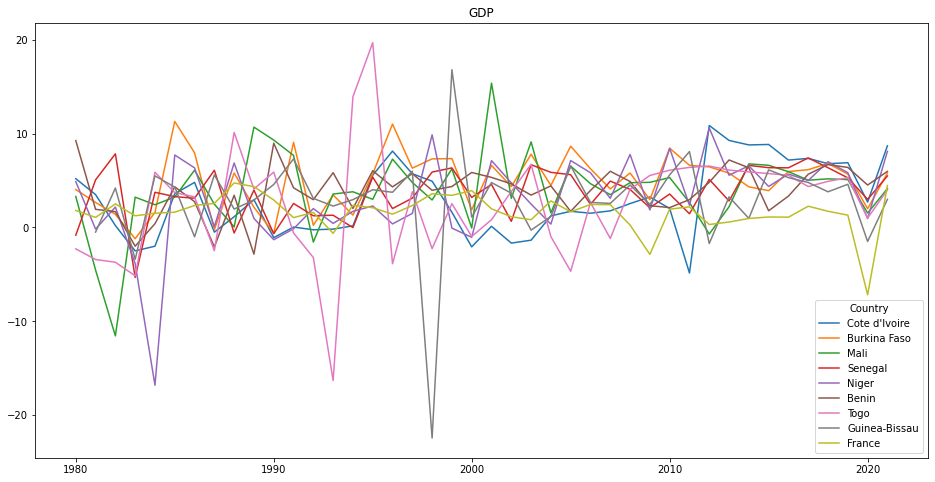

In [115]:
X2=X1.drop(columns=['Subject Descriptor', 'Units','Scale','Estimates Start After'])
X3=X2.T
new_header = X3.iloc[0] #grab the first row for the header
X4 = X3[1:] #take the data less the header row
X4.columns = new_header #set the header row as the df header
X4=X4.rename(columns={"CÙte d'Ivoire": "Cote d'Ivoire"})
X4[["Cote d'Ivoire","Burkina Faso","Mali","Senegal","Niger","Benin","Togo","Guinea-Bissau","France"]].plot(figsize=(16,8));
plt.title("GDP")


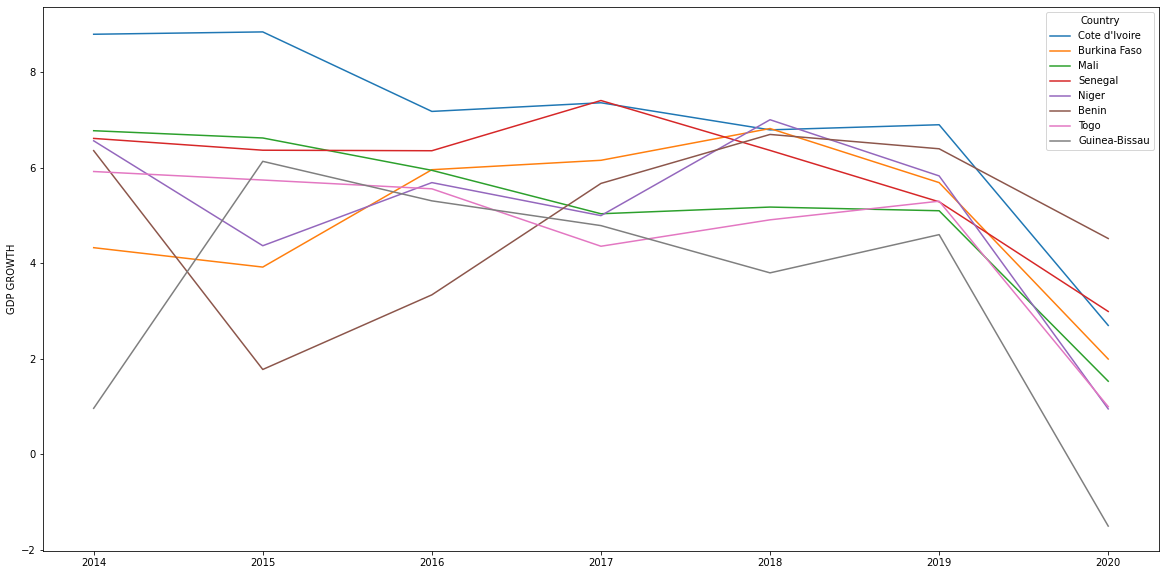

In [70]:
y=weo[weo['Subject Descriptor']=="Gross domestic product, constant prices"]
y1=y.iloc[:,3:]
y2=y1.drop(columns=['Subject Descriptor', 'Units','Scale'])
y3=y2.T
new_header1 = y3.iloc[0] #grab the first row for the header
y4 = y3[1:] #take the data less the header row
y4.columns = new_header1 #set the header row as the df header
y4=y4.rename(columns={"CÙte d'Ivoire": "Cote d'Ivoire"})
y4[["Cote d'Ivoire","Burkina Faso","Mali","Senegal","Niger","Benin","Togo","Guinea-Bissau"]].tail(7).plot(figsize=(20,10));
plt.ylabel('GDP GROWTH');

In [6]:
#Reepress Categorical Field Value in python
wb['status_numeric']=wb['status']
dic_status={"status_numeric":{"High income":4,"Low income":1,
                              "Lower middle income":2,"Upper middle income":3
                              }}
wb.replace(dic_status, inplace=True) 
pd.crosstab(wb['status'],wb['status_numeric'])                     

status_numeric,1.0,2.0,3.0,4.0
status,,,,
High income,0,0,0,132
Low income,69,0,0,0
Lower middle income,0,117,0,0
Upper middle income,0,0,112,0


In [7]:
#How to standardize numeric fields using python
from scipy import stats
wb['Account, income, poorest 40% (% ages 15+)_1']=stats.zscore(wb['Account, income, poorest 40% (% ages 15+)'])
wb['Account, income, poorest 40% (% ages 15+)_1'].describe()

count    4.910000e+02
mean    -1.061891e-16
std      1.001020e+00
min     -1.446873e+00
25%     -8.862901e-01
50%     -2.011326e-01
75%      9.356059e-01
max      1.667479e+00
Name: Account, income, poorest 40% (% ages 15+)_1, dtype: float64

In [7]:
tickers = ["AAPL", 'GM', "MBRX","LIFE","SNDL","CTRM","HCMC"]
multpl_stocks = web.get_data_yahoo(tickers,
start = "2000-01-01")
multpl_stocks['Close'].tail()

Symbols,AAPL,GM,MBRX,LIFE,SNDL,CTRM,HCMC
Date,,,,,,,
2021-02-22,126.000000,51.980000,4.92,5.16,1.43,1.230,0.00380
2021-02-23,125.860001,51.110001,4.64,4.65,1.26,1.110,0.00300
2021-02-24,125.349998,52.900002,4.56,4.77,1.45,1.110,0.00280
2021-02-25,120.989998,50.599998,4.35,4.56,1.37,1.010,0.00250
2021-02-26,121.260002,51.330002,4.23,4.35,1.33,0.999,0.00175


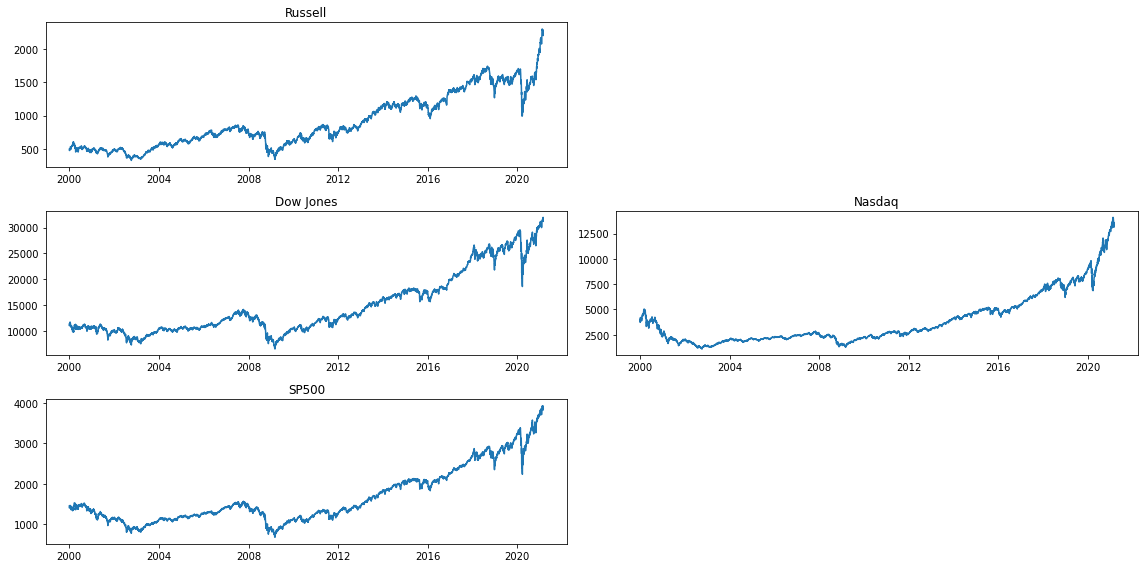

In [11]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(multpl_stocks['Adj Close']['^RUT'])
ax1.set_title("Russell")
#ax2.plot(multpl_stocks['Adj Close']['AAPL'])
#ax2.set_title("Apple")
ax3.plot(multpl_stocks['Adj Close']['^DJI'])
ax3.set_title("Dow Jones")
ax4.plot(multpl_stocks['Adj Close']['^IXIC'])
ax4.set_title("Nasdaq")
ax5.plot(multpl_stocks['Adj Close']['^GSPC'])
ax5.set_title("SP500")
plt.tight_layout()

In [12]:
#Calculating the returns for multiple stocks
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()
multpl_stock_quarterly_returns = multpl_stocks['Adj Close'].resample('Q').ffill().pct_change()
multpl_stock_annually_returns = multpl_stocks['Adj Close'].resample('Y').ffill().pct_change()


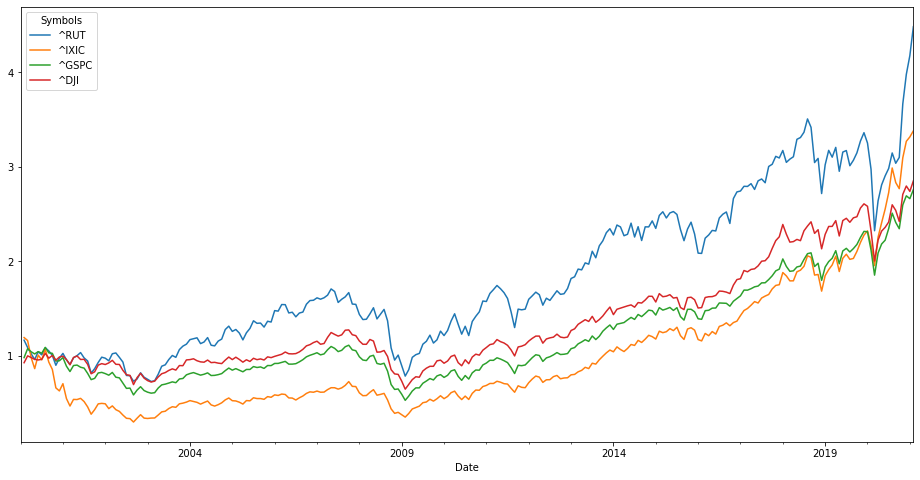

In [13]:
#Monthly return
(multpl_stock_monthly_returns + 1).cumprod().plot(figsize=(16,8));

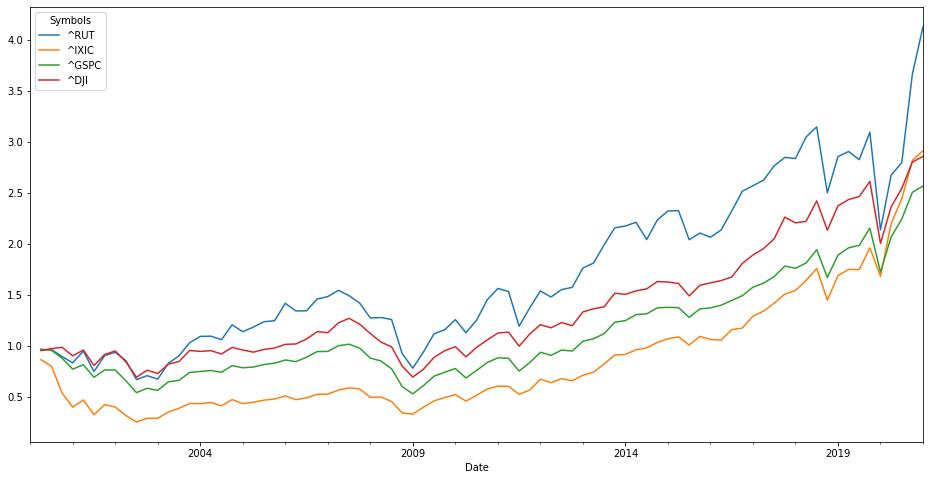

In [14]:
#quarterly return
(multpl_stock_quarterly_returns + 1).cumprod().plot(figsize=(16,8));

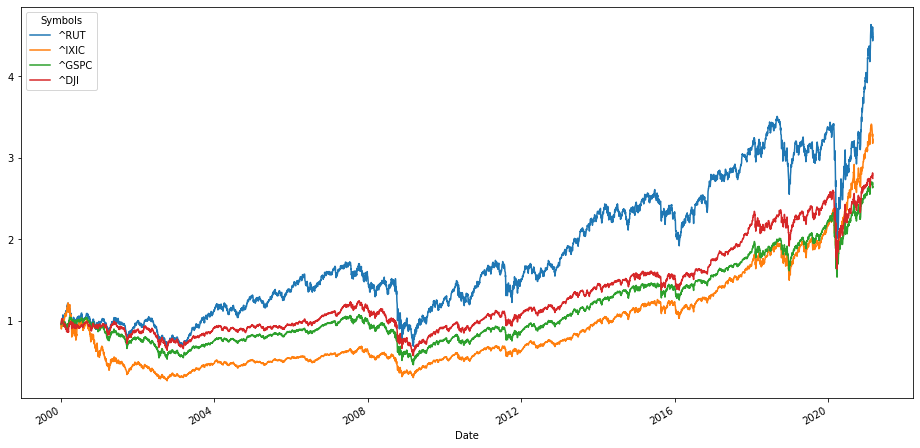

In [15]:
#Daily return
(multpl_stock_daily_returns + 1).cumprod().plot(figsize=(16,8));

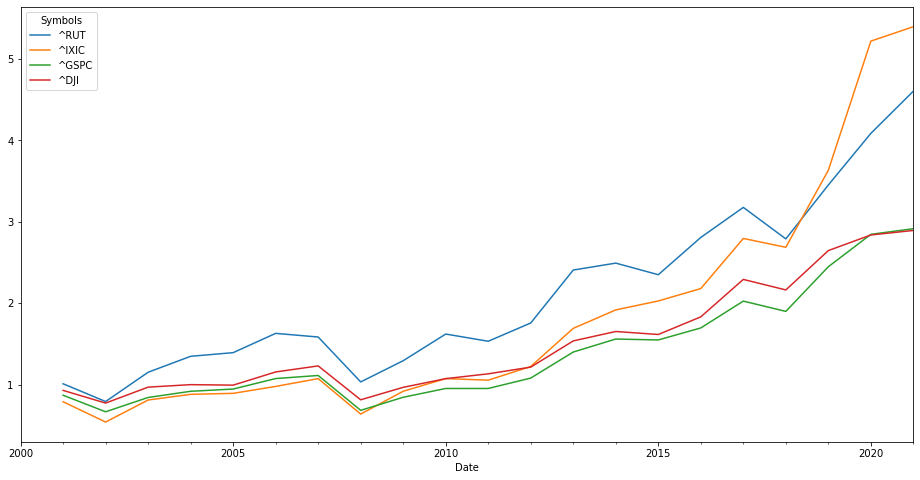

In [16]:
#Annual return
(multpl_stock_annually_returns + 1).cumprod().plot(figsize=(16,8));

Symbols
^RUT     0.007709
^IXIC    0.006897
^GSPC    0.004980
^DJI     0.005066
dtype: float64


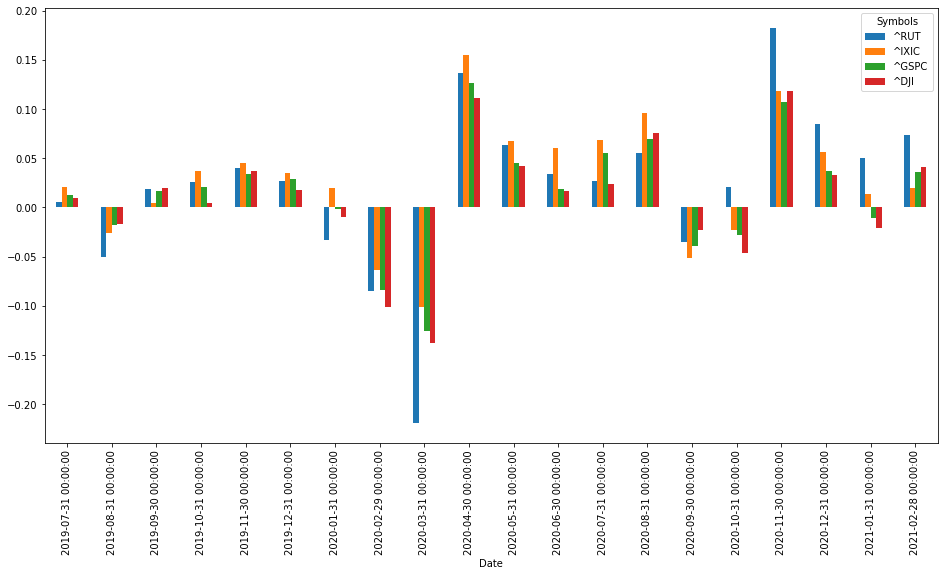

In [20]:
multpl_stock_monthly_returns.tail(20).plot(kind='bar',figsize=(16,8));
print(multpl_stock_monthly_returns.mean())

In [43]:
multpl_stock_quarterly_returns

Symbols,^RUT,^IXIC,^GSPC,^DJI
Date,,,,
2000-03-31,NaN,NaN,NaN,NaN
2000-06-30,-0.040550,-0.132679,-0.029348,-0.043402
2000-09-30,0.008004,-0.073949,-0.012436,0.019433
2000-12-31,-0.072578,-0.327351,-0.080911,0.012869
2001-03-31,-0.068248,-0.255112,-0.121149,-0.084280
...,...,...,...,...
2020-03-31,-0.308888,-0.141821,-0.200011,-0.232013
2020-06-30,0.249996,0.306317,0.199529,0.177748
2020-09-30,0.046012,0.110226,0.084737,0.076273


In [26]:
multpl_stock_monthly_returns1 = multpl_stocks['Adj Close'].resample('M').ffill()

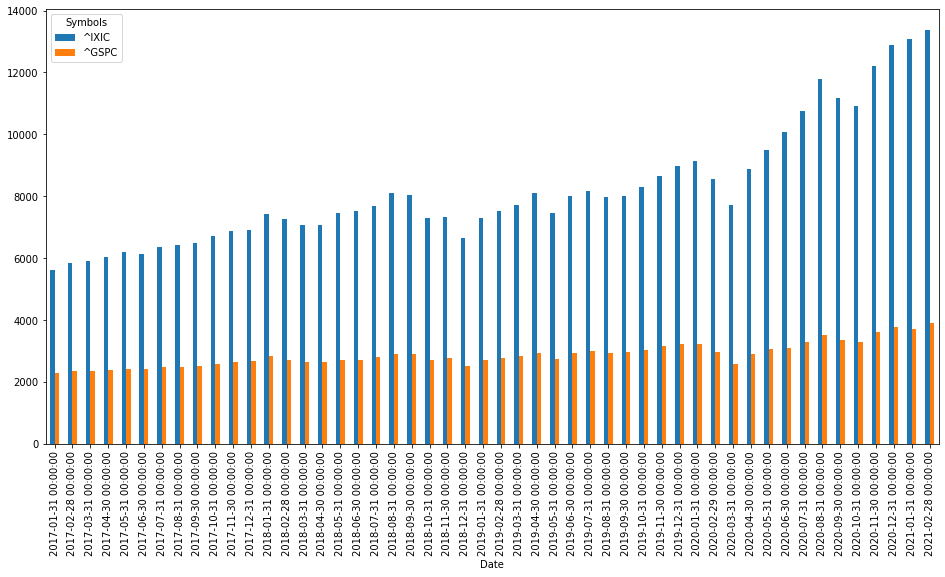

In [28]:
multpl_stock_monthly_returns1[['^IXIC', "^GSPC"]].tail(50).plot(kind='bar',figsize=(16,8));

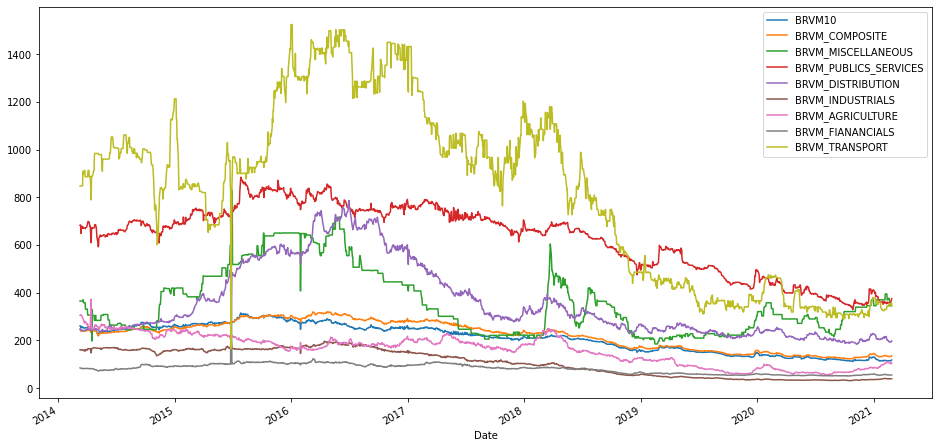

In [18]:
#BRVM ANALYSIS
brvm=pd.read_excel("BRVM.xlsx")
brvm['Date'] = pd.to_datetime(brvm['Date'])
brvm1=brvm.set_index('Date', inplace=True)
brvm['BRVM10'].plot(figsize=(16,8))

In [1]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.plot(brvm['BRVM10'])
ax1.set_title("BRVM 10")
ax2.plot(brvm['BRVM_COMPOSITE'])
ax2.set_title("BRVM COMPOSITE")
ax3.plot(brvm['BRVM_MISCELLANEOUS'])
ax3.set_title('BRVM MISCELLANEOUS')
ax4.plot(brvm['BRVM_PUBLICS_SERVICES'])
ax4.set_title('BRVM PUBLICS_SERVICES')
ax5.plot(brvm['BRVM_DISTRIBUTION'])
ax5.set_title('BRVM DISTRIBUTION')
ax6.plot(brvm['BRVM_INDUSTRIALS'])
ax6.set_title('BRVM INDUSTRIALS')
plt.tight_layout()

NameError: ignored

In [20]:
brvm.head()

,BRVM10,BRVM_COMPOSITE,BRVM_MISCELLANEOUS,BRVM_PUBLICS_SERVICES,BRVM_DISTRIBUTION,BRVM_INDUSTRIALS,BRVM_AGRICULTURE,BRVM_FIANANCIALS,BRVM_TRANSPORT
Date,,,,,,,,,
2021-02-25,118.11,135.07,345.49,374.82,197.41,39.14,105.09,54.90,353.64
2021-02-24,116.56,134.03,345.49,368.66,195.47,39.09,105.61,54.83,342.90
2021-02-23,115.59,132.95,345.49,364.61,192.90,39.19,100.61,54.58,354.83
2021-02-22,113.90,131.78,345.49,358.85,193.47,39.14,104.55,54.02,354.83
2021-02-19,114.72,132.67,345.49,358.82,194.32,38.85,104.29,54.88,353.64


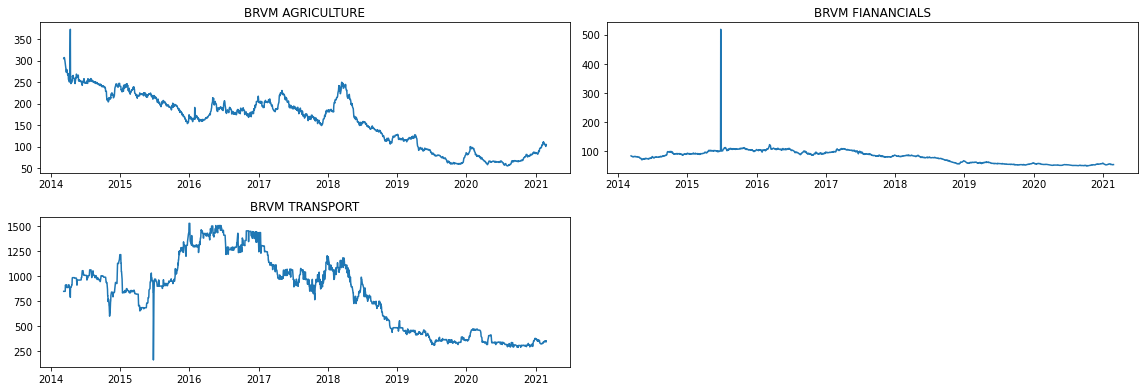

In [26]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax1.plot(brvm['BRVM_AGRICULTURE'])
ax1.set_title('BRVM AGRICULTURE')
ax2.plot(brvm['BRVM_FIANANCIALS'])
ax2.set_title('BRVM FIANANCIALS')
ax3.plot(brvm['BRVM_TRANSPORT'])
ax3.set_title('BRVM TRANSPORT')
plt.tight_layout()

In [30]:
brvm.describe().round

,BRVM10,BRVM_COMPOSITE,BRVM_MISCELLANEOUS,BRVM_PUBLICS_SERVICES,BRVM_DISTRIBUTION,BRVM_INDUSTRIALS,BRVM_AGRICULTURE,BRVM_FIANANCIALS,BRVM_TRANSPORT
count,1733.00,1733.00,1733.00,1733.00,1733.00,1733.00,1733.00,1733.00,1733.00
mean,211.23,222.85,359.01,630.08,359.23,108.34,160.67,81.10,826.25
std,58.42,59.99,137.91,143.72,157.16,56.08,62.10,22.33,365.34
min,111.07,122.19,185.08,328.64,100.82,31.24,55.40,50.38,165.06
25%,152.91,161.47,244.38,510.94,240.94,44.30,97.32,58.85,439.57
50%,219.21,235.99,320.81,669.83,293.45,113.13,173.78,83.64,895.68
75%,258.38,275.41,445.37,743.38,474.43,162.45,206.85,97.97,1064.39
max,315.18,320.30,827.56,884.61,786.55,212.26,372.85,518.52,1524.65


In [31]:
#Calculating the returns for multiple stocks
multpl_stock_daily_returns1 = brvm.pct_change()
multpl_stock_monthly_returns1 = brvm.resample('M').ffill().pct_change()
multpl_stock_quarterly_returns1 = brvm.resample('Q').ffill().pct_change()
multpl_stock_annually_returns1 = brvm.resample('Y').ffill().pct_change()

BRVM10                  -0.781562
BRVM_COMPOSITE          -0.588461
BRVM_MISCELLANEOUS       1.881015
BRVM_PUBLICS_SERVICES   -0.533765
BRVM_DISTRIBUTION        0.134116
BRVM_INDUSTRIALS        -1.511379
BRVM_AGRICULTURE        -0.549321
BRVM_FIANANCIALS        -0.356337
BRVM_TRANSPORT          -0.235516
dtype: float64


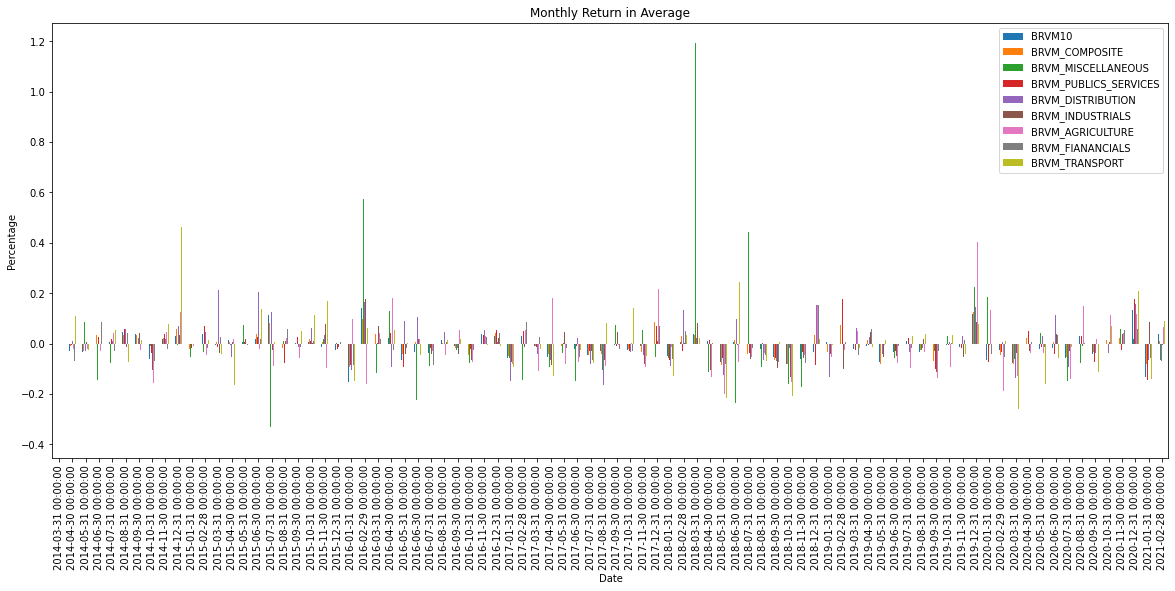

In [50]:
multpl_stock_monthly_returns1.tail(100).plot(kind='bar',figsize=(20,8));
plt.title("Monthly Return in Average")
plt.ylabel("Percentage")
print(multpl_stock_monthly_returns1.mean()*100)

BRVM10                  -10.358035
BRVM_COMPOSITE           -7.913164
BRVM_MISCELLANEOUS        3.794752
BRVM_PUBLICS_SERVICES    -7.674845
BRVM_DISTRIBUTION         0.758051
BRVM_INDUSTRIALS        -15.798780
BRVM_AGRICULTURE         -8.493273
BRVM_FIANANCIALS         -6.766056
BRVM_TRANSPORT          -11.994451
dtype: float64


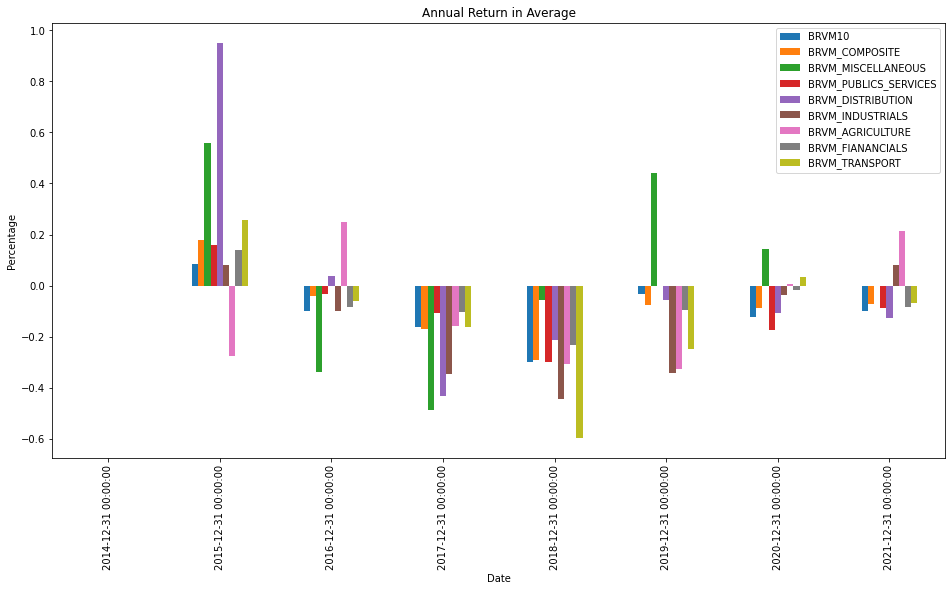

In [49]:
multpl_stock_annually_returns1.tail(20).plot(kind='bar',figsize=(16,8));
plt.title("Annual Return in Average")
plt.ylabel("Percentage")
print(multpl_stock_annually_returns1.mean()*100)

BRVM10                  -2.390443
BRVM_COMPOSITE          -1.751442
BRVM_MISCELLANEOUS       4.858684
BRVM_PUBLICS_SERVICES   -1.681066
BRVM_DISTRIBUTION        0.347850
BRVM_INDUSTRIALS        -4.499925
BRVM_AGRICULTURE        -1.879105
BRVM_FIANANCIALS        -1.074102
BRVM_TRANSPORT          -1.226312
dtype: float64


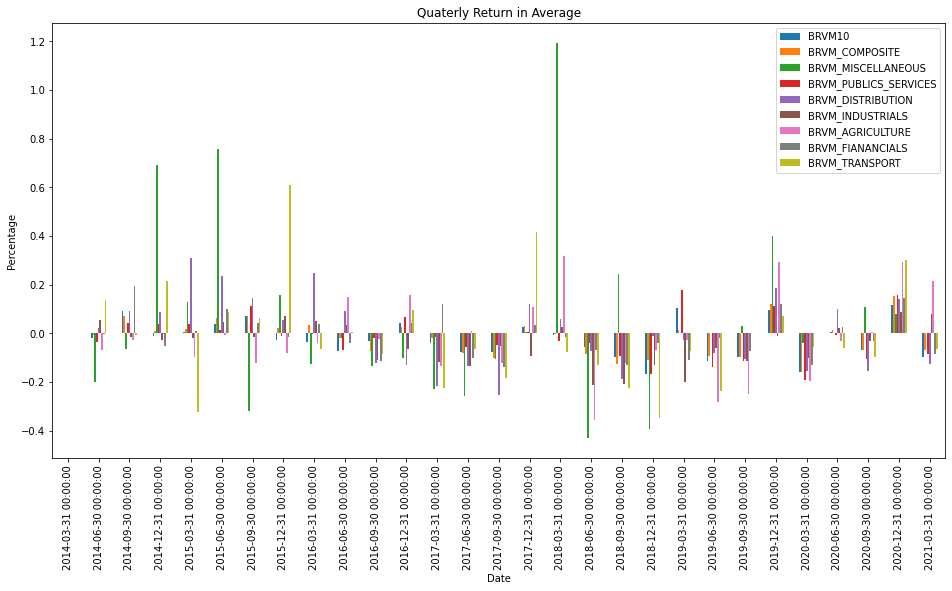

In [48]:
multpl_stock_quarterly_returns1.tail(30).plot(kind='bar',figsize=(16,8));
plt.title("Quaterly Return in Average")
plt.ylabel("Percentage")
print(multpl_stock_quarterly_returns1.mean()*100)

In [2]:
#stocks for Vine Copula
tickers = ["ADM", 'AEP',"AFL","BAC","BBY","BEN",
           "BK","CAG","CPB","DHI","EBAY","ED","EVRG",
           "EXC","FE","FITB","GIS","GS","HIG","HPQ","IBM",
           "INTC","IVZ","JPM","K","KEY","KMB","KR","LEN",
           "MAS","MMM","MOS","MS","NEM","NLOK","ORCL",
           "PEG","PGR","PHM","PPL","SO","STT","TSN",
           "USB","VZ"]
stocks = web.get_data_yahoo(tickers,
start = "2000-01-01")
stocks['Close'].tail().round(2)

Symbols,ADM,AEP,AFL,BAC,BBY,BEN,BK,CAG,CPB,DHI,EBAY,ED,EVRG,EXC,FE,FITB,GIS,GS,HIG,HPQ,IBM,INTC,IVZ,JPM,K,KEY,KMB,KR,LEN,MAS,MMM,MOS,MS,NEM,NLOK,ORCL,PEG,PGR,PHM,PPL,SO,STT,TSN,USB,VZ
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-24,58.48,77.10,49.85,36.38,113.46,27.93,44.26,35.24,46.24,80.05,59.38,66.65,54.55,40.19,34.25,36.25,56.20,330.64,53.15,27.97,123.21,63.19,23.26,153.26,58.61,21.54,130.81,32.75,86.25,53.81,177.63,32.12,79.88,57.08,20.55,64.70,56.05,87.74,46.92,27.49,58.38,76.82,68.87,52.81,57.12
2021-02-25,57.35,76.30,48.65,35.93,102.94,26.80,43.42,34.57,45.65,74.53,56.98,67.15,53.69,38.92,33.51,35.30,55.84,327.76,51.89,28.19,122.47,60.40,22.38,151.18,58.74,20.68,130.56,32.41,80.40,52.93,178.76,30.78,78.43,56.12,20.23,65.30,55.90,87.11,43.94,26.99,57.76,74.26,68.31,51.63,56.50
2021-02-26,56.58,74.85,47.89,34.71,100.35,26.17,42.16,33.93,45.48,76.87,56.42,65.65,53.63,38.60,33.14,34.69,55.01,319.48,50.69,28.97,118.93,60.78,22.42,147.17,57.71,20.14,128.33,32.21,82.97,53.22,175.06,29.40,76.87,54.38,19.51,64.51,53.83,85.95,45.11,26.19,56.72,72.77,67.67,50.00,55.30
2021-03-01,57.30,76.71,48.72,35.79,101.69,27.20,43.68,34.15,45.52,77.64,58.48,67.04,53.96,39.31,33.41,36.00,54.74,329.92,51.96,29.58,120.74,62.88,24.74,150.50,56.91,20.74,128.39,32.89,82.60,54.48,176.41,30.71,79.16,54.65,19.66,66.17,55.09,87.64,45.47,26.89,57.78,76.74,68.54,51.16,55.36
2021-03-02,57.24,76.46,48.74,35.67,101.55,26.99,43.83,34.13,45.24,77.47,57.28,66.56,53.58,39.51,33.06,36.03,54.61,332.40,51.55,29.76,120.76,62.03,24.30,150.87,57.21,20.63,128.55,32.42,82.12,53.65,175.04,31.62,80.35,55.38,19.48,66.17,54.40,87.68,45.13,26.83,57.49,76.93,68.46,51.01,55.31


In [13]:
stocks['Close'].tail(1).round(2)

Symbols,ADM,AEP,AFL,BAC,BBY,BEN,BK,CAG,CPB,DHI,EBAY,ED,EVRG,EXC,FE,FITB,GIS,GS,HIG,HPQ,IBM,INTC,IVZ,JPM,K,KEY,KMB,KR,LEN,MAS,MMM,MOS,MS,NEM,NLOK,ORCL,PEG,PGR,PHM,PPL,SO,STT,TSN,USB,VZ
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-02,57.24,76.46,48.74,35.67,101.55,26.99,43.83,34.13,45.24,77.47,57.28,66.56,53.58,39.51,33.06,36.03,54.61,332.4,51.55,29.76,120.76,62.03,24.3,150.87,57.21,20.63,128.55,32.42,82.12,53.65,175.04,31.62,80.35,55.38,19.48,66.17,54.4,87.68,45.13,26.83,57.49,76.93,68.46,51.01,55.31


In [4]:
#Return
#Calculating the returns for multiple stocks
stocks_daily_returns1 = stocks['Close'].pct_change()
stocks_monthly_returns1 =stocks['Close'].resample('M').ffill().pct_change()
stocks_quarterly_returns1 =stocks['Close'].resample('Q').ffill().pct_change()
stocks_annually_returns1 = stocks['Close'].resample('Y').ffill().pct_change()
stocks_annually_returns1.describe().round(2)

Symbols,ADM,AEP,AFL,BAC,BBY,BEN,BK,CAG,CPB,DHI,EBAY,ED,EVRG,EXC,FE,FITB,GIS,GS,HIG,HPQ,IBM,INTC,IVZ,JPM,K,KEY,KMB,KR,LEN,MAS,MMM,MOS,MS,NEM,NLOK,ORCL,PEG,PGR,PHM,PPL,SO,STT,TSN,USB,VZ
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,0.09,0.04,0.07,0.09,0.25,0.07,0.01,0.05,0.03,0.20,0.22,0.03,0.07,0.03,0.02,0.02,0.05,0.12,0.06,0.10,0.04,0.09,0.04,0.09,0.04,0.04,0.04,0.07,0.16,0.08,0.07,0.18,0.08,0.10,0.12,0.07,0.06,0.14,0.17,0.03,0.06,0.04,0.13,0.05,0.02
std,0.24,0.16,0.19,0.37,0.71,0.28,0.23,0.24,0.19,0.47,0.42,0.12,0.29,0.22,0.20,0.28,0.14,0.37,0.32,0.36,0.23,0.34,0.35,0.24,0.12,0.31,0.15,0.23,0.40,0.30,0.21,0.81,0.39,0.32,0.34,0.24,0.20,0.25,0.53,0.20,0.14,0.25,0.31,0.17,0.14
min,-0.38,-0.37,-0.32,-0.66,-0.51,-0.44,-0.42,-0.43,-0.31,-0.50,-0.58,-0.20,-0.42,-0.32,-0.37,-0.67,-0.34,-0.61,-0.81,-0.45,-0.36,-0.50,-0.57,-0.34,-0.16,-0.64,-0.24,-0.26,-0.66,-0.48,-0.32,-0.63,-0.70,-0.50,-0.33,-0.52,-0.41,-0.23,-0.68,-0.41,-0.10,-0.52,-0.43,-0.21,-0.26
25%,-0.04,-0.04,-0.02,-0.11,-0.22,-0.07,-0.13,-0.06,-0.08,-0.15,0.02,-0.03,-0.06,-0.12,-0.06,-0.13,-0.01,-0.07,-0.11,-0.18,-0.14,-0.15,-0.15,-0.09,-0.04,-0.13,-0.06,-0.05,0.02,-0.14,-0.05,-0.17,-0.24,-0.09,-0.16,-0.11,-0.06,-0.01,-0.16,-0.08,-0.05,-0.13,-0.07,-0.10,-0.05
50%,0.09,0.08,0.10,0.15,0.10,0.06,0.02,0.06,0.02,0.13,0.14,0.04,0.06,0.04,0.07,0.01,0.07,0.09,0.10,0.20,0.04,0.05,0.07,0.06,0.07,0.04,0.06,0.07,0.11,0.11,0.01,-0.03,0.15,0.08,0.14,0.15,0.04,0.10,0.06,0.01,0.05,0.07,0.16,0.04,-0.01
75%,0.23,0.13,0.22,0.31,0.40,0.31,0.16,0.16,0.14,0.47,0.39,0.15,0.15,0.21,0.20,0.19,0.14,0.38,0.24,0.37,0.18,0.27,0.27,0.31,0.14,0.17,0.15,0.16,0.43,0.30,0.17,0.28,0.33,0.25,0.25,0.23,0.17,0.29,0.23,0.21,0.12,0.20,0.33,0.20,0.14
max,0.58,0.30,0.36,1.09,2.37,0.65,0.38,0.60,0.50,1.49,1.03,0.25,1.05,0.35,0.29,0.51,0.38,1.00,0.61,0.96,0.56,1.06,0.63,0.53,0.21,0.59,0.24,0.62,0.97,0.64,0.51,3.42,0.85,0.89,0.99,0.40,0.48,0.68,1.88,0.45,0.45,0.56,0.72,0.40,0.28


In [5]:
return_mean1=stocks_annually_returns1.mean()*100
return_mean2=stocks_monthly_returns1.mean()*100
return_mean3=stocks_quarterly_returns1.mean()*100
return_mean4=stocks_daily_returns1.mean()*100


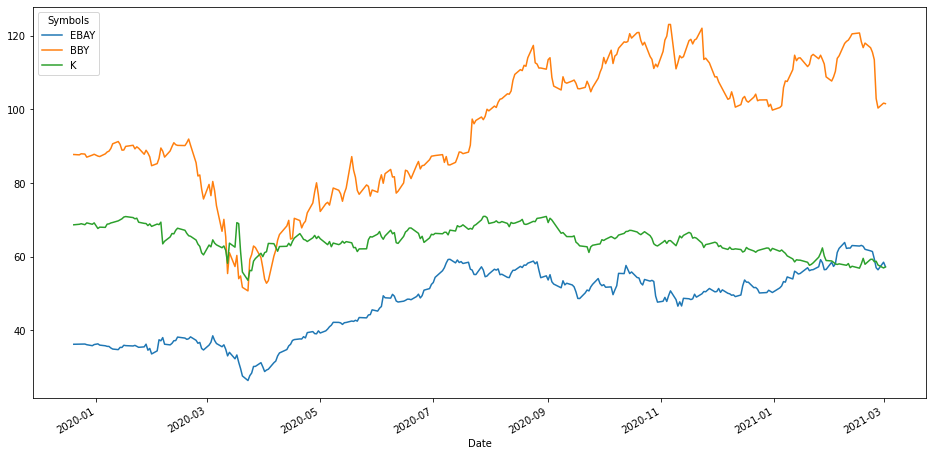

In [37]:
(stocks['Close'][['EBAY','BBY','K']].tail(300)).plot(figsize=(16,8));

In [7]:
return_an1 = pd.DataFrame(data=return_mean1, columns=['Return annual'])
return_an2 = pd.DataFrame(data=return_mean2, columns=['Return monthly'])
return_an3 = pd.DataFrame(data=return_mean3, columns=['Return quarterly'])
return_an4= pd.DataFrame(data=return_mean4, columns=['Return daily'])
x_annually=stocks_annually_returns1.dropna()
print(stocks_annually_returns1.head())
print(return_an1['Return annual'].mean(),": annual")
print(return_an2['Return monthly'].mean(),": monthly")
print(return_an3['Return quarterly'].mean(),": quarterly")
print(return_an4['Return daily'].mean(),": daily")
return_an1.to_csv('return1.csv')
return_an2.to_csv('return2.csv')
return_an3.to_csv('return3.csv')
return_an4.to_csv('return4.csv')
stocks['Close'].to_csv('stocks.csv', sep=',')

Symbols          ADM       AEP       AFL  ...       TSN       USB        VZ
Date                                      ...                              
2000-12-31       NaN       NaN       NaN  ...       NaN       NaN       NaN
2001-12-31  0.004500 -0.063871 -0.319550  ... -0.094118 -0.099785 -0.053167
2002-12-31 -0.135889 -0.372157  0.226384  ... -0.028571  0.013856 -0.183523
2003-12-31  0.227419  0.116356  0.201195  ...  0.180036  0.403393 -0.094710
2004-12-31  0.465834  0.125533  0.101161  ...  0.389728  0.051713  0.154789

[5 rows x 45 columns]
8.081053706875204 : annual
0.7810158005274489 : monthly
2.3078487299468704 : quarterly
0.04426005644197325 : daily


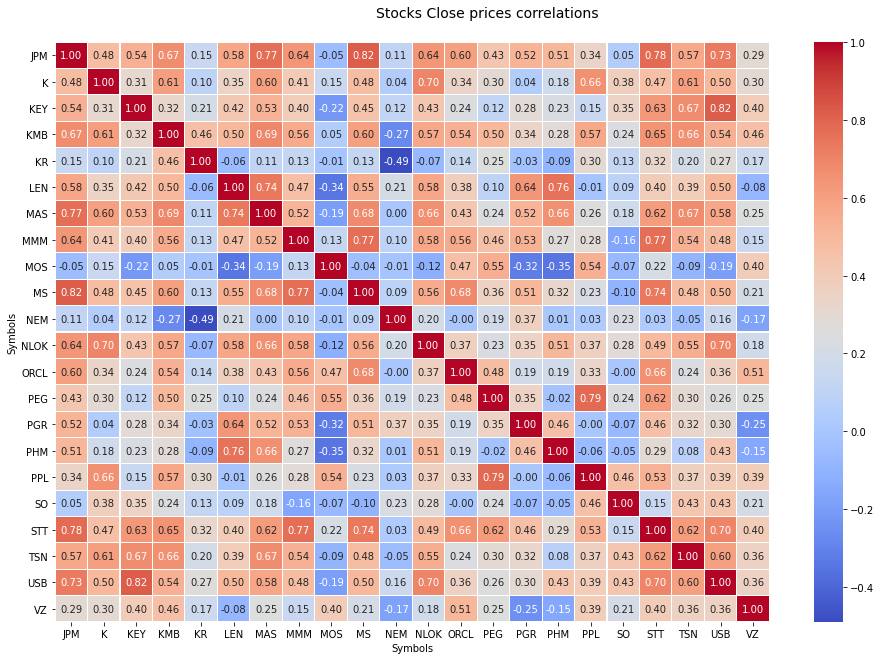

In [7]:
#Correlation Matrix plot for return
import seaborn as sn
f, ax = plt.subplots(figsize=(16, 10))
corr =stocks_annually_returns1.iloc[2:,25:].corr()
hm = sn.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Stocks Close prices correlations', fontsize=14)

In [ ]:
#Correlation Matrix plot for stocks
import seaborn as sn
f, ax = plt.subplots(figsize=(16, 10))
corr =stocks_annually_returns1.iloc[2:,25:].corr()
hm = sn.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Stocks Close prices correlations', fontsize=14)

In [4]:
#Decision Tree on BANK analysis
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
bank=pd.read_excel("bankx.xlsx",sheet_name='bank')
bank1=bank=pd.read_excel("bankx.xlsx",sheet_name='bank1')
bank1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,y1,age,marital,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education,job,day_of_week,month,y
0,0,30,married,no,yes,no,cellular,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,basic.9y,blue-collar,fri,may,no
1,0,39,single,no,no,no,telephone,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,high.school,services,fri,may,no
2,0,25,married,no,yes,no,telephone,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,high.school,services,wed,jun,no
3,0,38,married,no,unknown,unknown,telephone,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,basic.9y,services,fri,jun,no
4,0,47,married,no,yes,no,cellular,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,university.degree,admin.,mon,nov,no


Simple cross table of marital and loan 

In [14]:
pd.crosstab(bank['marital'],bank1['loan'])

loan,no,unknown,yes
marital,,,
divorced,365,9,72
married,2031,68,410
single,943,28,182
unknown,10,0,1


Split the data to predictors(X) and target variable(y)

In [16]:
y=bank1[['y1']]
X=bank1.loc[:,['age','marital','duration','nr.employed']]

Transform all categories data to dummies variables

In [24]:
mar_np=np.array(bank1['marital'])
(mar_cat,mar_cat_dict)=stattools.categorical(mar_np,drop=True,dictnames=True)
mar_cat_pd=pd.DataFrame(mar_cat)
X1=pd.concat((bank1[['age','duration','nr.employed']],mar_cat_pd),axis=1)
X1_names=["age","divorced","married","single","unknown ",
          "duration","nr.employed"]
y_names=["0=No","1=Yes"]

In [30]:
cart01=DecisionTreeClassifier(criterion="gini",max_leaf_nodes=5).fit(X1,y)
export_graphviz(cart01,out_file='cart_01.dot',feature_names=X1_names,class_names=y_names)

In [35]:
predictI=cart01.predict(X1)
predictI

array([0, 0, 0, ..., 0, 0, 0])

WORKING WITH SHAPASH

In [3]:
!pip install shapash
import numpy as np
import pandas as pd

In [5]:
from shapash.data.data_loader import data_loading
house_df, house_dict = data_loading('house_prices')
y_df=house_df['SalePrice'].to_frame()
X_df=house_df[house_df.columns.difference(['SalePrice'])]
house_df.head(3)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2-Story 1946 & Newer,Residential Low Density,8450,Paved,Regular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Inside lot,Gentle slope,College Creek,Normal,Normal,Single-family Detached,Two story,7,5,2003,2003,Gable,Standard (Composite) Shingle,Vinyl Siding,Vinyl Siding,Brick Face,196.0,Good,Average/Typical,Poured Contrete,Good (90-99 inches),Typical - slight dampness allowed,No Exposure/No Basement,Good Living Quarters,706,Unfinished/No Basement,0,150,856,Gas forced warm air furnace,Excellent,Yes,Standard Circuit Breakers & Romex,856,854,0,1710,1,0,2,1,3,1,Good,8,Typical Functionality,0,Attached to home,2003.0,Rough Finished,548,Typical/Average,Typical/Average,Paved,0,61,0,0,0,0,0,2,2008,Warranty Deed - Conventional,Normal Sale,208500
2,1-Story 1946 & Newer All Styles,Residential Low Density,9600,Paved,Regular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Frontage on 2 sides of property,Gentle slope,Veenker,Adjacent to feeder street,Normal,Single-family Detached,One story,6,8,1976,1976,Gable,Standard (Composite) Shingle,Metal Siding,Metal Siding,None,0.0,Average/Typical,Average/Typical,Cinder Block,Good (90-99 inches),Typical - slight dampness allowed,Good Exposure,Average Living Quarters,978,Unfinished/No Basement,0,284,1262,Gas forced warm air furnace,Excellent,Yes,Standard Circuit Breakers & Romex,1262,0,0,1262,0,1,2,0,3,1,Typical/Average,6,Typical Functionality,1,Attached to home,1976.0,Rough Finished,460,Typical/Average,Typical/Average,Paved,298,0,0,0,0,0,0,5,2007,Warranty Deed - Conventional,Normal Sale,181500
3,2-Story 1946 & Newer,Residential Low Density,11250,Paved,Slightly irregular,Near Flat/Level,"All public Utilities (E,G,W,& S)",Inside lot,Gentle slope,College Creek,Normal,Normal,Single-family Detached,Two story,7,5,2001,2002,Gable,Standard (Composite) Shingle,Vinyl Siding,Vinyl Siding,Brick Face,162.0,Good,Average/Typical,Poured Contrete,Good (90-99 inches),Typical - slight dampness allowed,Mimimum Exposure,Good Living Quarters,486,Unfinished/No Basement,0,434,920,Gas forced warm air furnace,Excellent,Yes,Standard Circuit Breakers & Romex,920,866,0,1786,1,0,2,1,3,1,Good,6,Typical Functionality,1,Attached to home,2001.0,Rough Finished,608,Typical/Average,Typical/Average,Paved,0,42,0,0,0,0,0,9,2008,Warranty Deed - Conventional,Normal Sale,223500


Encode the categorical features

In [8]:
!pip install --upgrade category_encoders
from category_encoders import OrdinalEncoder
categorical_features = [col for col in X_df.columns if X_df[col].dtype == 'object']
encoder = OrdinalEncoder(cols=categorical_features).fit(X_df)
X_df=encoder.transform(X_df)

     |████████████████████████████████| 81kB 3.3MB/s 


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Train, test split and model fitting

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, train_size=0.75)
reg = RandomForestRegressor(n_estimators=200, min_samples_leaf=2).fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


And predict test data

In [12]:
y_pred = pd.DataFrame(reg.predict(Xtest), index=Xtest.index)

In [13]:
from shapash.explainer.smart_explainer import SmartExplainer

In [14]:
xpl = SmartExplainer(features_dict=house_dict) # Optional parameter

features_dict: dict that specifies the meaning of each column name of the x pd.DataFrame